In [1]:
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import astropy.units as u
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
mh = '+0.0'
CtoO = '1.0'


filename_db="/Users/sagnickmukherjee/Documents/GitHub/picaso-dev/reference/opacities/ck_cx_cont_opacities.db"
ck_db='/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_db/m'+mh+'_co'+CtoO+'.data.196'

opacity_ck = jdi.opannection(ck=True, ck_db=ck_db,filename_db=filename_db)


In [3]:
T_eff= 1400
grav = 1000
nlevel = 91
fsed =1

## Brown Dwarf 
T_star = "NA"
semi_major = "NA" # AU
self_consistent_kzz= True # Only needed if you want to do on-the-fly calculation with MLT Kzz
##


# Lets use Kzz = 1d4 in cgs

In [4]:
cl_run = jdi.inputs(calculation="brown", climate = True)

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)'))
cl_run.T_eff(Teff=T_eff)




#pressure=np.logspace(np.log10(1.77000392e-04),np.log10(80.0),nlevel) # set your pressure grid
temp_guess = np.zeros(shape=(nlevel))
kz = np.zeros(shape =(nlevel))

## load a bobcat model
pressure_dummy,temp_guess = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(1400)+"g1000"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)
pressure=pressure_dummy

#pressure = np.logspace(np.log10(1.77e-4),np.log10(222),nlevel)
#temp_guess = pressure+800

for i in range(len(temp_guess)):
    temp_guess[i] = temp_guess[i] # perturb the profile
    kz[i] = 1e8 #0
    
nofczns = 1
nstr = np.array([0,79,89,0,0,0]) # initial guess of convective zones
rfacv = 0.0
rfaci =1.0
cloudy = True # not cloudy
fsed = fsed
#species = [ 'Al2O3','MnS', 'Cr', 'Fe', 'MgSiO3']
species = ['Fe','MgSiO3']

In [5]:
cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure, nstr = nstr, nofczns = nofczns , rfacv = rfacv, rfaci = rfaci, cloudy = cloudy, mh = mh, CtoO = CtoO,species = species, fsed = fsed)


In [6]:
t0 = time.time()
pressure , temp, dtdp, nstr_new, flux_plus_final, quench_levels, df, all_profiles, all_kzz, opd_cld,w0_cld,g0_cld = cl_run.run_climate_model(opacity_ck,save_all_profiles=True, save_all_kzz =True,diseq_chem = True, self_consistent_kzz =self_consistent_kzz, kz = kz,vulcan_run = False)
t1 = time.time()

Iteration number  0 , min , max temp  579.8809779867402 3814.695559739106 , flux balance  0.002257864702774506
Iteration number  1 , min , max temp  572.17767031502 4635.713031794422 , flux balance  0.011285999844576544
Iteration number  2 , min , max temp  571.758204373393 4433.698628911273 , flux balance  0.0005361161013526653
Iteration number  3 , min , max temp  571.7255709932134 4418.860738120744 , flux balance  1.8903699324831973e-06
Converged Solution in iterations  3
Take caution in analyzing results. There have been a calculated particle radii off the Mie grid, which has a min radius of 1e-08cm and distribution of 2. The following errors:2.2187863294599595e-07cm for the 0th gas at the 0th grid point; 2.7378808170175287e-07cm for the 0th gas at the 1th grid point;  Turn off warnings by setting verbose=False.
Max TAUCLD diff is 8.137431375571193  Tau tolerance is  1.6274862751142387
Big iteration is  571.7255709932134 0
Iteration number  0 , min , max temp  576.2549029561526 445

Max TAUCLD diff is 0.846406234930269  Tau tolerance is  1.013661987112507
Profile converged
[ 0 73 77 77 79 89]
Iteration number  0 , min , max temp  725.6118083660427 5199.9 , flux balance  -0.06900521508392163
Converged Solution in iterations  0
Take caution in analyzing results. There have been a calculated particle radii off the Mie grid, which has a min radius of 1e-08cm and distribution of 2. The following errors:3.05703772764611e-07cm for the 0th gas at the 0th grid point;  Turn off warnings by setting verbose=False.
Max TAUCLD diff is 0.7351960946544063  Tau tolerance is  0.5064004778257436
Big iteration is  725.6118083660427 0
Iteration number  0 , min , max temp  725.73247688475 5199.9 , flux balance  -0.1545387577215622
Converged Solution in iterations  0
Take caution in analyzing results. There have been a calculated particle radii off the Mie grid, which has a min radius of 1e-08cm and distribution of 2. The following errors:3.072936251812453e-07cm for the 0th gas at the 0

Take caution in analyzing results. There have been a calculated particle radii off the Mie grid, which has a min radius of 1e-08cm and distribution of 2. The following errors:3.0575350316969156e-07cm for the 0th gas at the 0th grid point;  Turn off warnings by setting verbose=False.
Max TAUCLD diff is 0.633248819626993  Tau tolerance is  0.4777382395156529
Big iteration is  728.7737734874096 0
Iteration number  0 , min , max temp  728.8869973483534 5199.9 , flux balance  -0.1507858015740706
Converged Solution in iterations  0
Take caution in analyzing results. There have been a calculated particle radii off the Mie grid, which has a min radius of 1e-08cm and distribution of 2. The following errors:3.1120269549845053e-07cm for the 0th gas at the 0th grid point;  Turn off warnings by setting verbose=False.
Max TAUCLD diff is 0.7178132821363963  Tau tolerance is  0.47899272091480605
Big iteration is  728.8869973483534 1
Iteration number  0 , min , max temp  729.0716735509396 5199.9 , flux

Iteration number  1 , min , max temp  853.5019433335484 4550.114884534064 , flux balance  2.1331103832096394e-06
Converged Solution in iterations  1
Max TAUCLD diff is 0.962635773119668  Tau tolerance is  0.5771920998020978
Big iteration is  853.5019433335484 2
Iteration number  0 , min , max temp  850.4656068154532 4514.1375133615065 , flux balance  0.0024062972956416166
Iteration number  1 , min , max temp  850.5264657179864 4511.728688354277 , flux balance  5.783974189984288e-06
Converged Solution in iterations  1
Max TAUCLD diff is 0.9565338202594916  Tau tolerance is  0.21226769475657364
Big iteration is  850.5264657179864 3
Iteration number  0 , min , max temp  848.1181837238935 4416.128302522611 , flux balance  0.0009034358200615052
Iteration number  1 , min , max temp  848.1289048703377 4400.4595458659705 , flux balance  3.1350579655100154e-05
Iteration number  2 , min , max temp  848.1299141373443 4399.035789363825 , flux balance  2.481869640077511e-06
Converged Solution in it

Max TAUCLD diff is 0.6154350679140764  Tau tolerance is  0.5877161098205382
Big iteration is  849.9248910969442 1
Iteration number  0 , min , max temp  860.3810882032902 4061.3949467494567 , flux balance  0.0026591903606990497
Iteration number  1 , min , max temp  860.3327156724226 4057.6348715096383 , flux balance  2.8233554421353376e-05
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [53 34 67 52]
Max TAUCLD diff is 0.8767417680090491  Tau tolerance is  0.5282534505721624
Big iteration is  860.3327156724226 2
Iteration number  0 , min , max temp  860.0333995671311 4155.882589429179 , flux balance  -0.019628631363675087
Iteration number  1 , min , max temp  859.4168232895793 4395.749126474007 , flux balance  0.003911104246907937
Iteration number  2 , min , max temp  859.6907783771046 4370.514367329846 , flux balance  4.724455480809653e-05
Iteration number  3 , min , max temp  859.695230406134 4368.847104297601 , flux balance  1.366112771135261e-07
Converged So

In [7]:
'''
TEGP,PEGP = np.loadtxt("/Users/sagnickmukherjee/Documents/research/geers/vhs1256b/allpt/t900g1000f1_m0.0_co1.0.pt",usecols=[2,1],unpack=True,skiprows=1)


pressure_bobcat,temp_bobcat = np.loadtxt("/Users/sagnickmukherjee/Documents/research/pol_grid/Evolution/structures_m+0.0/t"+str(T_eff)+"g1000"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)

plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.ylim(205,1e-4)
plt.xlim(100,4000)

plt.semilogy(temp,pressure,color="r",linewidth=3,label="Our Run")

plt.semilogy(TEGP,PEGP,color="b",linewidth=3,linestyle="--",label="Morley Run")

plt.semilogy(temp_bobcat,pressure_bobcat,color="k",linewidth=3,label="Clear EGP")


plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.legend(fontsize=15)

plt.title(r"T$_{\rm eff}$= 1000 K, log(g)=5.0",fontsize=25)
'''



'\nTEGP,PEGP = np.loadtxt("/Users/sagnickmukherjee/Documents/research/geers/vhs1256b/allpt/t900g1000f1_m0.0_co1.0.pt",usecols=[2,1],unpack=True,skiprows=1)\n\n\npressure_bobcat,temp_bobcat = np.loadtxt("/Users/sagnickmukherjee/Documents/research/pol_grid/Evolution/structures_m+0.0/t"+str(T_eff)+"g1000"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)\n\nplt.figure(figsize=(10,10))\nplt.ylabel("Pressure [Bars]", fontsize=25)\nplt.xlabel(\'Temperature [K]\', fontsize=25)\nplt.ylim(205,1e-4)\nplt.xlim(100,4000)\n\nplt.semilogy(temp,pressure,color="r",linewidth=3,label="Our Run")\n\nplt.semilogy(TEGP,PEGP,color="b",linewidth=3,linestyle="--",label="Morley Run")\n\nplt.semilogy(temp_bobcat,pressure_bobcat,color="k",linewidth=3,label="Clear EGP")\n\n\nplt.minorticks_on()\nplt.tick_params(axis=\'both\',which=\'major\',length =30, width=2,direction=\'in\',labelsize=23)\nplt.tick_params(axis=\'both\',which=\'minor\',length =10, width=2,direction=\'in\',labelsize=23)\n\nplt.legend(fontsize

Text(0.5, 1.0, 'T$_{\\rm eff}$= 1000 K, log(g)=5.0')

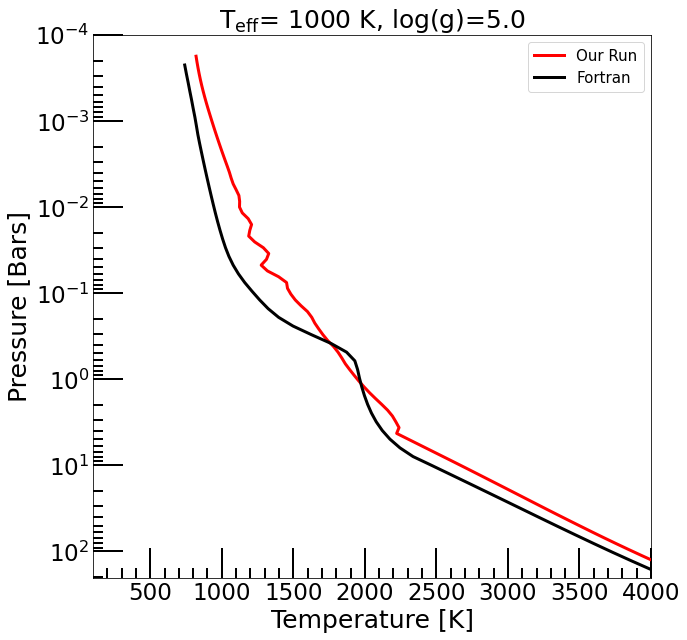

In [7]:
#TEGP,PEGP = np.loadtxt("/Users/sagnickmukherjee/Documents/research/geers/vhs1256b/allpt/t900g1000f2_m0.0_co1.0.pt",usecols=[2,1],unpack=True,skiprows=1)

#pressure,temp = np.loadtxt("Benchmarking/cloudy/tpfile/tp_cld_planet_900_grav_1000_fsed_3FeMgSiO3.dat",usecols=[0,1],unpack=True)
pressure_bobcat,temp_bobcat = np.loadtxt("Benchmarking/cloudy/fortran/1400_1000_fsed1.dat",usecols=[1,2],unpack=True, skiprows = 1)

plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.ylim(205,1e-4)
plt.xlim(100,4000)

plt.semilogy(temp,pressure,color="r",linewidth=3,label="Our Run")

#plt.semilogy(TEGP,PEGP,color="b",linewidth=3,linestyle="--",label="Morley Run")

plt.semilogy(temp_bobcat,pressure_bobcat,color="k",linewidth=3,label="Fortran")


plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.legend(fontsize=15)

plt.title(r"T$_{\rm eff}$= 1000 K, log(g)=5.0",fontsize=25)



Text(0.5, 1.0, 'T$_{\\rm eff}$= 1000 K, log(g)=5.0')

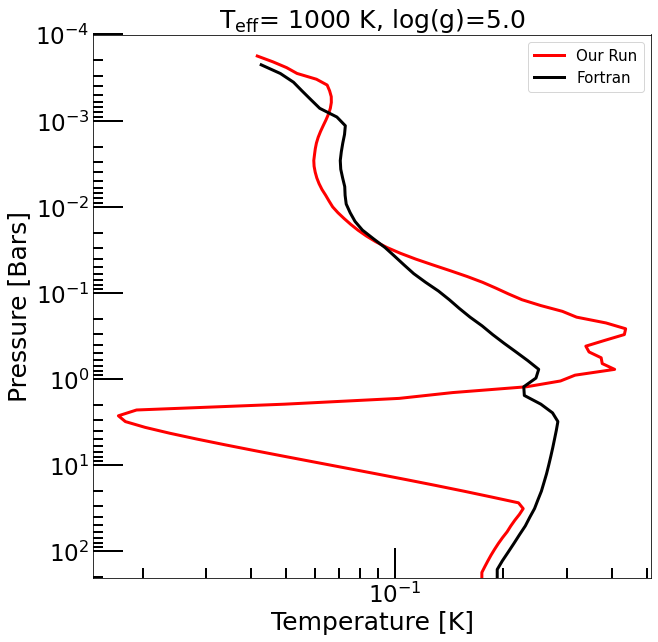

In [9]:
def dtdp(p,t):
    dtdp = np.zeros(len(t))
    for i in range(len(p)-1):
        dtdp[i] = np.log10(t[i+1]/t[i])/np.log10(p[i+1]/p[i])
    dtdp[-1] = dtdp[-2]
    return 1.0/dtdp 


#TEGP,PEGP = np.loadtxt("/Users/sagnickmukherjee/Documents/research/geers/vhs1256b/allpt/t900g1000f1_m0.0_co1.0.pt",usecols=[2,1],unpack=True,skiprows=1)

#pressure,temp = np.loadtxt("Benchmarking/cloudy/tpfile/tp_cld_planet_900_grav_1000_fsed_2.dat",usecols=[0,1],unpack=True)
pressure_bobcat,temp_bobcat = np.loadtxt("Benchmarking/cloudy/fortran/FeMgSiO3_fsed3_new.dat",usecols=[1,2],unpack=True, skiprows = 1)

plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.ylim(205,1e-4)
#plt.xlim(1e-3,2)

plt.semilogy(dtdp(temp,pressure),pressure,color="r",linewidth=3,label="Our Run")

#plt.semilogy(dtdp(TEGP,PEGP),color="b",linewidth=3,linestyle="--",label="Morley Run")

plt.loglog(dtdp(temp_bobcat,pressure_bobcat),pressure_bobcat,color="k",linewidth=3,label="Fortran")


plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.legend(fontsize=15)

plt.title(r"T$_{\rm eff}$= 1000 K, log(g)=5.0",fontsize=25)



In [13]:
path = "/Users/sagnickmukherjee/Documents/GitHub/picaso/Benchmarking/cloudy/"

filename= path+"tpfile/tp_cld_planet_"+str(T_eff)+"_grav_"+str(grav)+"_fsed_"+str(fsed)+"Femgsio3.dat"
np.savetxt(filename, np.transpose([pressure,temp]), header= str("nstr "+str(nstr_new)+" T_eff "+str(T_eff)+" grav "+ str(grav)+" fsed "+str(fsed)+ " species " + str(np.array(species))))     

csv = path+"profile/profile_cld_planet_"+str(T_eff)+"_grav_"+str(grav)+"_fsed_"+str(fsed)+"Femgsio3.dat"
df.to_csv(csv,sep='\t')

hist = path+"hist/hist_cld_planet_"+str(T_eff)+"_grav_"+str(grav)+"_fsed_"+str(fsed)+"Femgsio3.dat"
np.savetxt(hist, all_profiles)

cld = path+"cloud/opd_cld_planet_"+str(T_eff)+"_grav_"+str(grav)+"_fsed_"+str(fsed)+"Femgsio3.npy"
np.save(cld, opd_cld)
           
cld = path+"cloud/g0_cld_planet_"+str(T_eff)+"_grav_"+str(grav)+"_fsed_"+str(fsed)+"Femgsio3.npy"
np.save(cld, g0_cld)
           
cld = path+"cloud/w0_cld_planet_"+str(T_eff)+"_grav_"+str(grav)+"_fsed_"+str(fsed)+"Femgsio3.npy"
np.save(cld, w0_cld)

In [16]:
def read_file(T_eff,grav,fsed):
    
    path = "/Users/sagnickmukherjee/Documents/GitHub/picaso/Benchmarking/cloudy/"

    filename= path+"tpfile/tp_cld_planet_"+str(T_eff)+"_grav_"+str(grav)+"_fsed_"+str(fsed)+"Fe.dat"
    p,t = np.loadtxt(filename,usecols=[0,1],unpack=True)     
    
    cld = path+"cloud/opd_cld_planet_"+str(T_eff)+"_grav_"+str(grav)+"_fsed_"+str(fsed)+"Fe.npy"
    opd_cld = np.load(cld)
    
    
    return p,t,opd_cld
 

    

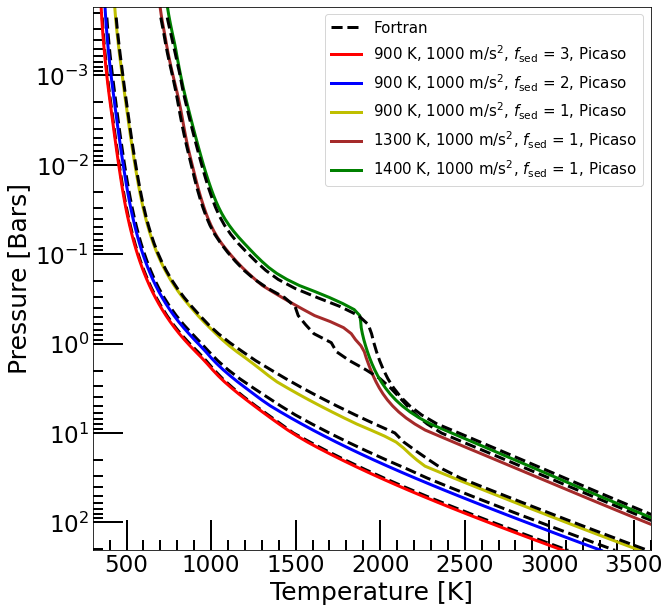

In [25]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
ax.set_ylabel("Pressure [Bars]", fontsize=25)
ax.set_xlabel('Temperature [K]', fontsize=25)
ax.set_ylim(205,1.7e-4)
ax.set_xlim(300,3600)
#ax1 = ax.twiny()
#plt.xlim(1e-3,2)

p,t,opd_cld = read_file(900,1000,3)
pressure_bobcat,temp_bobcat = np.loadtxt("Benchmarking/cloudy/fortran/Fe_fsed3_new.dat",usecols=[1,2],unpack=True, skiprows = 1)

ax.semilogy(temp_bobcat,pressure_bobcat,color="k",linewidth=3,linestyle="--",label="Fortran")
ax.semilogy(t,p,color="r",linewidth=3,label=r"900 K, 1000 m/s$^2$, $f_{\rm sed}$ = 3, Picaso")

#ax1.loglog(opd_cld[:,150],p[:-1],color="r")


p,t,opd_cld = read_file(900,1000,2)
pressure_bobcat,temp_bobcat = np.loadtxt("Benchmarking/cloudy/fortran/Fe_fsed2_new.dat",usecols=[1,2],unpack=True, skiprows = 1)

ax.semilogy(temp_bobcat,pressure_bobcat,color="k",linewidth=3,linestyle="--")
ax.semilogy(t,p,color="b",linewidth=3,label=r"900 K, 1000 m/s$^2$, $f_{\rm sed}$ = 2, Picaso")

#ax1.loglog(opd_cld[:,150],p[:-1],color="b")


p,t,opd_cld = read_file(900,1000,1)
pressure_bobcat,temp_bobcat = np.loadtxt("Benchmarking/cloudy/fortran/Fe_fsed1_new.dat",usecols=[1,2],unpack=True, skiprows = 1)

ax.semilogy(t,p,color="y",linewidth=3,label=r"900 K, 1000 m/s$^2$, $f_{\rm sed}$ = 1, Picaso")
ax.semilogy(temp_bobcat,pressure_bobcat,color="k",linewidth=3,linestyle="--")


pressure_bobcat,temp_bobcat = np.loadtxt("Benchmarking/cloudy/fortran/1300_1000_fsed1.dat",usecols=[1,2],unpack=True, skiprows = 1)
T_eff,grav,fsed=1300,1000,1
filename= path+"tpfile/tp_cld_planet_"+str(T_eff)+"_grav_"+str(grav)+"_fsed_"+str(fsed)+"Femgsio3.dat"
p,t = np.loadtxt(filename,usecols=[0,1],unpack=True)   
ax.semilogy(t,p,color="brown",linewidth=3,label=r"1300 K, 1000 m/s$^2$, $f_{\rm sed}$ = 1, Picaso")
ax.semilogy(temp_bobcat,pressure_bobcat,color="k",linewidth=3,linestyle="--")


pressure_bobcat,temp_bobcat = np.loadtxt("Benchmarking/cloudy/fortran/1400_1000_fsed1.dat",usecols=[1,2],unpack=True, skiprows = 1)
T_eff,grav,fsed=1400,1000,1
filename= path+"tpfile/tp_cld_planet_"+str(T_eff)+"_grav_"+str(grav)+"_fsed_"+str(fsed)+"Femgsio3.dat"
p,t = np.loadtxt(filename,usecols=[0,1],unpack=True)   
ax.semilogy(t,p,color="green",linewidth=3,label=r"1400 K, 1000 m/s$^2$, $f_{\rm sed}$ = 1, Picaso")
ax.semilogy(temp_bobcat,pressure_bobcat,color="k",linewidth=3,linestyle="--")



#plt.semilogy(dtdp(TEGP,PEGP),color="b",linewidth=3,linestyle="--",label="Morley Run")


#pressure_dummy,temp_guess = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(900)+"g1000"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)
#ax.semilogy(temp_guess,pressure_dummy,color="k",linewidth=1,label="900 K, 1000 m/s$^2$, Clear")
#ax1.set_xlim(1e-4,10)
#ax1.set_xlabel("Cloud OPD",fontsize=25)

ax.minorticks_on()
ax.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
ax.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

#ax1.minorticks_on()
#ax1.tick_params(axis='x',which='major',length =30, width=2,direction='in',labelsize=23)
#ax1.tick_params(axis='x',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.legend(fontsize=15)

plt.savefig("Benchmarking/picaso_virga_fortran_comparison.pdf",bboz_inches='tight')
